### Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sci
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Reading the data as dataframe

In [4]:
heal = pd.read_csv('insurance (2).csv') #heal is the name of the dataframe

### Checking the data for completion

In [9]:
heal #Calling heal to view the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [26]:
#shape of the data
heal.shape

(1338, 7)

In [29]:
#Checking the top values of the data
heal.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [165]:
print(heal.describe(include='all'))        #viewing all the details of the dataset
print(heal.describe())                     #viewing the details of only the numerical data from the dataset

                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    

In [96]:
heal.info()                         #checking the necessary info for EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


### Datatype of each attribute

In [174]:
heal.dtypes            #datatypes of the dataset

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [89]:
#Checking the presence of missing value
heal.fillna(heal.mean(), inplace=True)
heal.describe()
#looking at the data after and before describe function. I don't see any missing values.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 5 POINT SUMMARY OF NUMERICAL ATTRIBUTES

In [186]:
# Median: The middle value in the sample, also called the 50th percentile or the 2nd quartile.
# 1st Quartile: The 25th percentile.
# 3rd Quartile: The 75th percentile.
# Minimum: The smallest observation in the sample.
# Maximum: The largest observation in the sample.
#
# We can just printed out the describe or info function but wanted to check and retrieve separetely

print("5 point summary for Age")
print("* Median:" , heal['age'].median())
age_quartile1 = np.percentile(heal['age'], 25)
print("* 1st Quartile" , age_quartile1)
age_quartile3 = np.percentile(heal['age'], 75)
print("* 3rd Quartile" , age_quartile3)
print("* Minimum value :" , heal['age'].min())
print("* Maximum value :" , heal['age'].max())
print("")
print("5 point summary for BMI")
print("* Median:" , heal['bmi'].median())
bmi_quartile1 = np.percentile(heal['bmi'], 25)
print("* 1st Quartile" , bmi_quartile1)
bmi_quartile2 = np.percentile(heal['bmi'], 75)
print("* 3rd Quartile" , bmi_quartile2)
print("* Minimum value :" , heal['bmi'].min())
print("* Maximum value :" , heal['bmi'].max())
print("")
print("5 point summary for Children ")
print("* Median:" , heal['children'].median())
children_quartile1 = np.percentile(heal['children'], 25)
print("* 1st Quartile" , children_quartile1)
children_quartile2 = np.percentile(heal['children'], 75)
print("* 3rd Quartile" , children_quartile2)
print("* Minimum value :" , heal['children'].min())
print("* Maximum value :" , heal['children'].max())
print("")
print("5 point summary for Charges")
print("* Median:" , heal['charges'].median())
charges_quartile1 = np.percentile(heal['charges'], 25)
print("* 1st Quartile" , charges_quartile1)
charges_quartile2 = np.percentile(heal['charges'], 75)
print("* 3rd Quartile" , charges_quartile2)
print("* Minimum value :" , heal['charges'].min())
print("* Maximum value :" , heal['charges'].max())

5 point summary for Age
* Median: 39.0
* 1st Quartile 27.0
* 3rd Quartile 51.0
* Minimum value : 18
* Maximum value : 64

5 point summary for BMI
* Median: 30.4
* 1st Quartile 26.29625
* 3rd Quartile 34.69375
* Minimum value : 15.96
* Maximum value : 53.13

5 point summary for Children 
* Median: 1.0
* 1st Quartile 0.0
* 3rd Quartile 2.0
* Minimum value : 0
* Maximum value : 5

5 point summary for Charges
* Median: 9382.033
* 1st Quartile 4740.28715
* 3rd Quartile 16639.912515
* Minimum value : 1121.8739
* Maximum value : 63770.42801


### Distribution of AGE, BMI and CHARGES

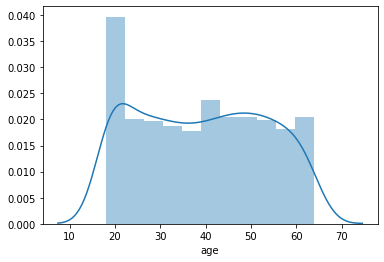

In [170]:
#distribution of Age using distplot
sns.distplot(heal['age'])  

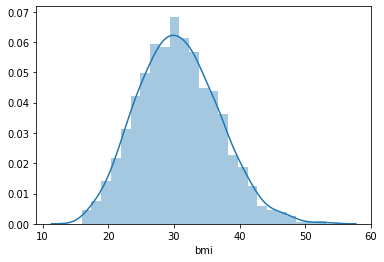

In [171]:
#distribution of BMI
sns.distplot(heal['bmi'])   #almost shows as a normalized funtion

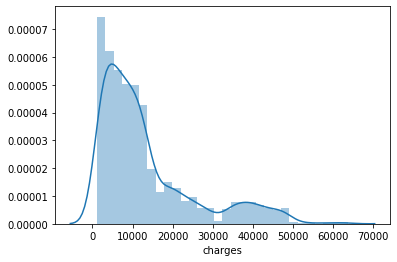

In [172]:
#distribution of Charges
sns.distplot(heal['charges'])            #right skewed 

### Measuring the Skewness

In [181]:
print("Age Skew =", heal['age'].skew())
print("BMI Skew =", heal['bmi'].skew())
print("Charges Skew =", heal['charges'].skew())



Age Skew = 0.05567251565299186
BMI Skew = 0.2840471105987448
Charges Skew = 1.5158796580240388


### Checking the presence of outlier

In [303]:
q1 = heal.quantile(0.25)
q2 = heal.quantile(0.75)
iqr = q2-q1
print(iqr)         #Checking the iqr values of the entire dataset
#print(heal<(q1 - 1.5 * iqr)) | (heal >(q2 + 1.5 * iqr) ) 

age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64


24.0


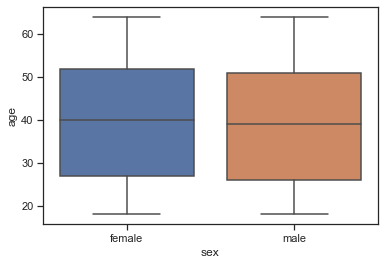

In [310]:
sns.boxplot(x='sex' , y='age', data=heal)
#finding the outlier using the IQR method
age_q1 = heal['age'].quantile(0.25)
age_q2 = heal['age'].quantile(0.75)
age_iqr = age_q2-age_q1 #where iqr is interquartile range
print(age_iqr)
#print(heal['age']<(age_q1 - 1.5 * age_iqr)) | (heal['age'] >(age_q2 + 1.5 * age_iqr), where(true) )
# NO OUTLIERS

8.3975


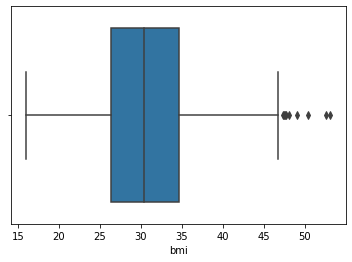

In [235]:
sns.boxplot(heal['bmi'])
bmi_q1 = heal['bmi'].quantile(0.25)
bmi_q2 = heal['bmi'].quantile(0.75)
bmi_iqr = bmi_q2-bmi_q1
print(bmi_iqr)

#OUTLIERS shown by the dots outside the boxplot

11899.625365


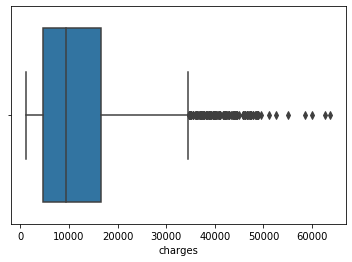

In [5]:
sns.boxplot(heal['charges'])
#sns.scatterplot(heal['charges'])
charges_q1 = heal['charges'].quantile(0.25)
charges_q2 = heal['charges'].quantile(0.75)
charges_iqr = charges_q2-charges_q1
print(charges_iqr)
#many values outside the box plot suggests outlier but considering them as part of the varience of the dataset.

### Distribution of Categorical Columns

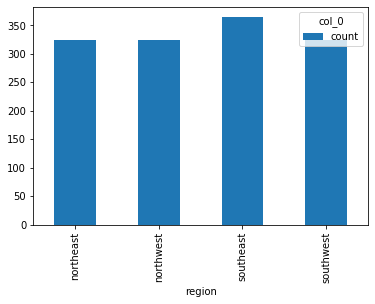

In [267]:
category_region = pd.crosstab(index = heal["region"],columns="count")  #make a crosstab and name to count column
category_region.plot.bar()

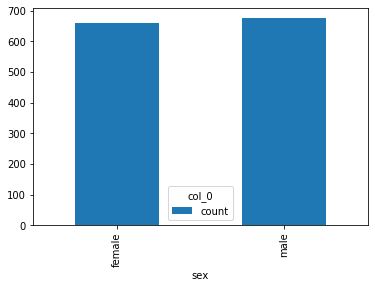

In [252]:
category_sex = pd.crosstab(index = heal["sex"],columns="count")  #make a crosstab and name to count column
category_sex.plot.bar()

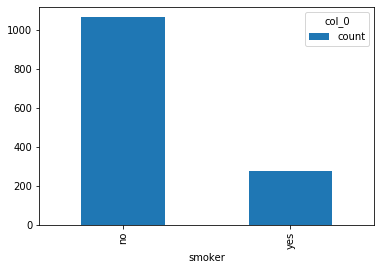

In [253]:
category_smoker = pd.crosstab(index = heal["smoker"],columns="count")  #make a crosstab and name to count column
category_smoker.plot.bar()

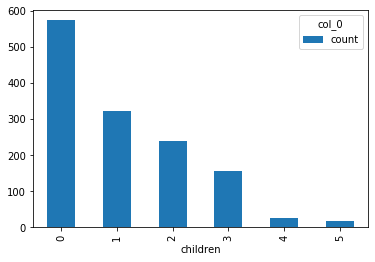

In [254]:
category_children = pd.crosstab(index = heal["children"],columns="count")  #make a crosstab and name to count column
category_children.plot.bar()

### Pair Plot

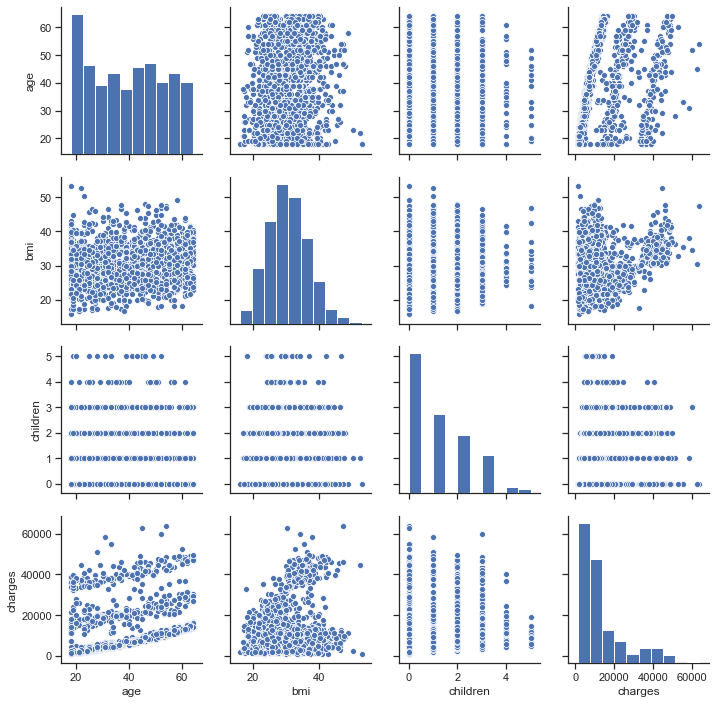

In [287]:
sns.set(style="ticks", color_codes=True)
# = sns.load_dataset("iris")
sns.pairplot(heal) #Pair plot of numerical values

### Q -1 : Do charges of people who smoke differ significantly from the people who don't?
### Ans - Yes, as explained by the graph

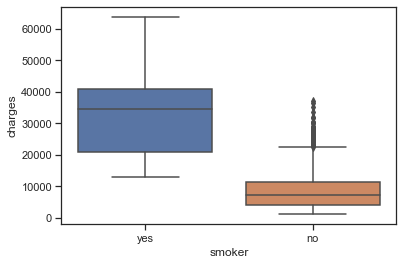

In [311]:
sns.boxplot(x='smoker' , y='charges', data=heal) #Median, upper limit, lower limit etc all have higher value.

### Does bmi of males differ significantly from that of females?
### Ans - Maybe, the difference in bmi is not significantly high. Certain males have more BMI but not as a group.


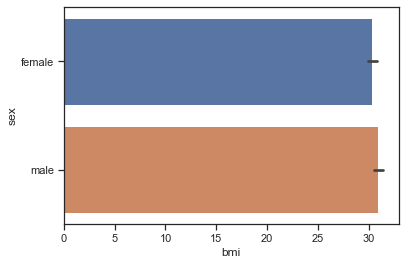

In [330]:
sns.barplot(x='bmi', y="sex", data=heal)

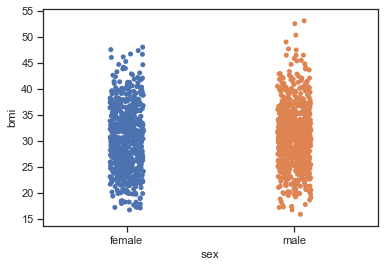

In [332]:
sns.stripplot(heal['sex'], heal['bmi'] , jitter = True)

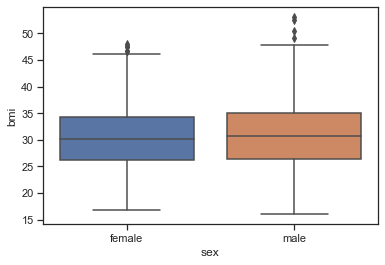

In [335]:
sns.boxplot(x='sex' , y='bmi', data=heal) #boxplot shows almost the same median and upper and lower quartet values

### Is the proportion of smokers significantly different in different genders?
### Yes, they are significantly different

smoker   no  yes
sex             
female  547  115
male    517  159

Proportion of Male smokers =  0.23520710059171598
Proportion of Female smokers =  0.17371601208459214


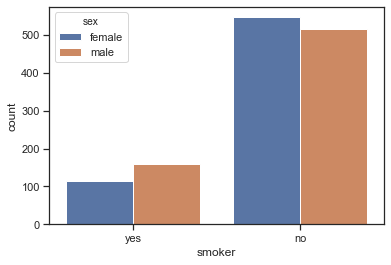

In [367]:
print(pd.crosstab(heal['sex'],heal['smoker']))
sns.countplot(data=heal, x='smoker', hue='sex')
male_p=159/(517+159)
female_p=115/(547+115)
print("")
print("Proportion of Male smokers = ", male_p)
print("Proportion of Female smokers = ", female_p)

### Is the distribution of bmi across women with no children, one child and two children, the same ?
### Yes Almost!

#### State the NULL and alternate Hypothesis 
#### H0 - u1 =u2=u3
#### H1 - Atleast 1 u differs; Significance level alpha = 0.05
#### where u1, u2, u3 are the 

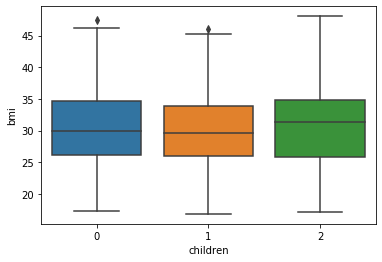

In [24]:
#sns.regplot(x="children", y="bmi",data=heal)
import statsmodels.api as sm
from statsmodels.formula.api import ols
alpha = 0.05

bmi_women = heal[(heal['sex'] == 'female') & (heal['children'] < 3)].drop(['age','sex','smoker','region', 'charges'], axis=1)
sns.boxplot(x=bmi_women['children'], y=bmi_women['bmi'])


In [22]:
mod = ols('bmi ~ C(children)', data=bmi_women).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(children),24.590123,2.0,0.334472,0.715858
Residual,20695.661583,563.0,NaN,NaN


In [25]:
if aov_table.loc['C(children)','PR(>F)'] < alpha:
    print("We Reject the null hypothesis. The distribution between women with 0, 1 and 2 children is different.")
else:
    print("We fail to reject the null hypothesis. The distribution between women with 0,1 and 2 children is same")

We fail to reject the null hypothesis. The distribution between women with 0,1 and 2 children is same
